# CRISP - DM Method

- Barry -> Business understanding
- Drove -> Data understanding
- Directly to the -> Data prep
- Medical -> Modelling
- Emergency -> Evaluation
- Department -> Deployment


In [1]:
import pandas as pd
df = pd.read_csv('regression.csv')
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [2]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [4]:
df.columns

Index(['Year', 'Month', 'Cost Centre', 'Account', 'Account Description',
       'Account Type', 'Amount'],
      dtype='object')

In [5]:
for col in df.columns:
  len_ = df[col].unique()
  print(f'{col}, length:{len(len_)} -> {len_}\n')

Year, length:3 -> [2019 2020 2021]

Month, length:12 -> ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']

Cost Centre, length:9 -> ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']

Account, length:13 -> [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]

Account Description, length:13 -> ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']

Account Type, length:4 -> ['Revenue' 'Expense' 'Asset' 'Liability']

Amount, length:3956 -> [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]



In [6]:
df.describe(include='object')

,Month,Cost Centre,Account Description,Account Type
count,4212,4212,4212,4212
unique,12,9,13,4
top,May,CC300,Product Sales,Expense
freq,351,468,324,1620


In [7]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [8]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

## Data visualize

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Account Types')

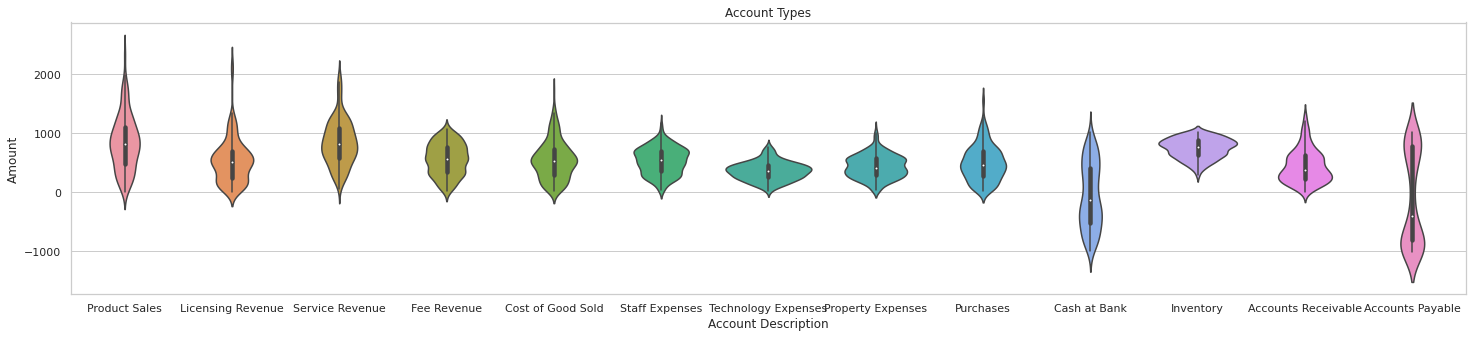

In [30]:
#violin plot
plt.figure(figsize=(25,5))
sns.violinplot(x='Account Description', y='Amount', data=df).set_title('Account Types')

Text(0.5, 1.0, 'Account Types')

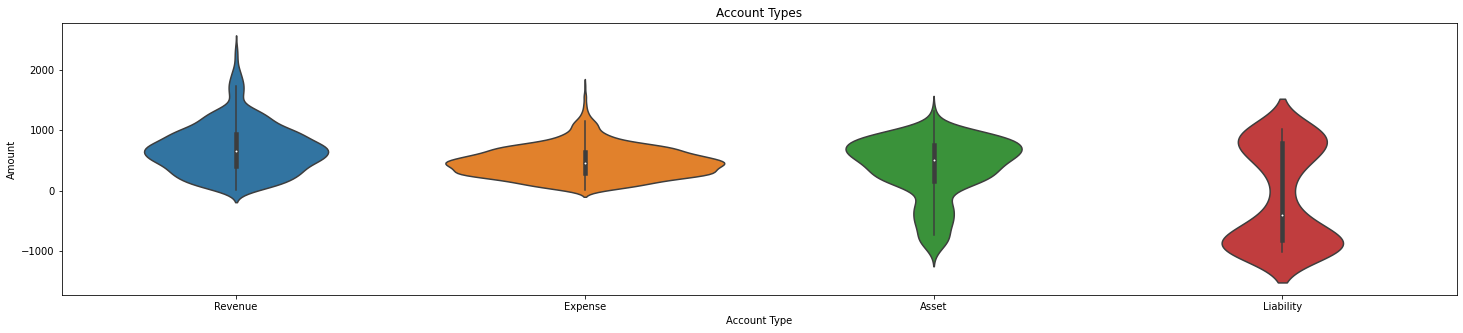

In [11]:
#violin plot
plt.figure(figsize=(25,5))
sns.violinplot(x='Account Type', y='Amount', data=df).set_title('Account Types')

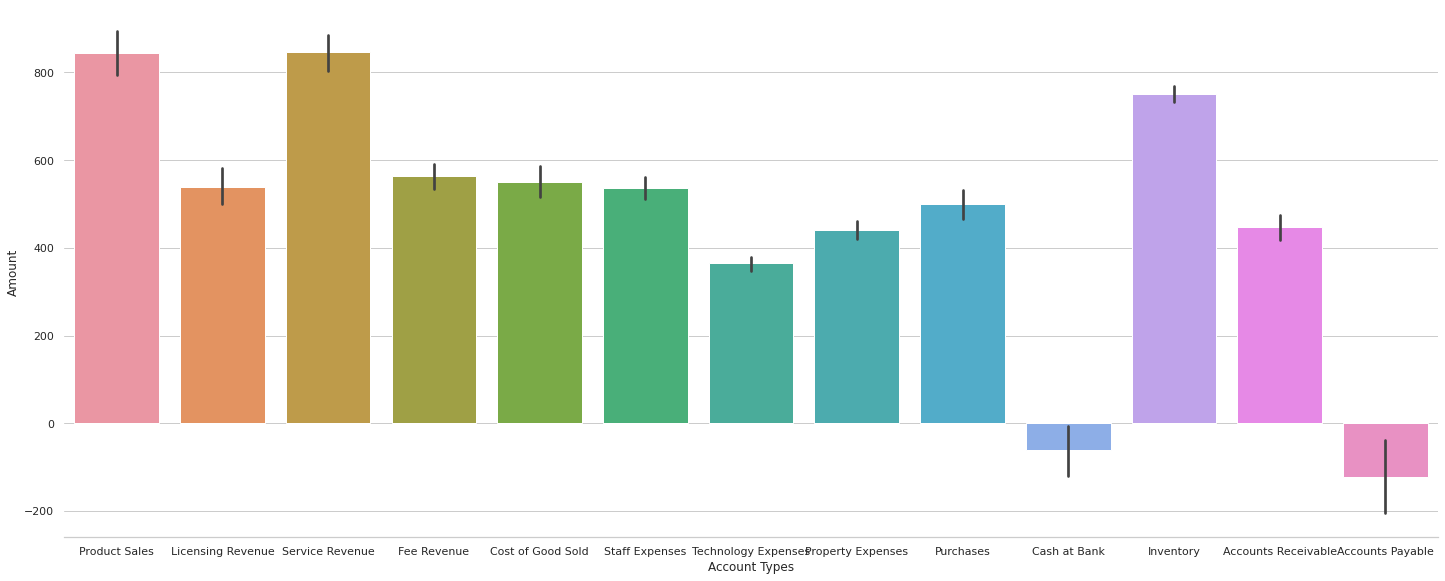

In [31]:
sns.set_theme(style="whitegrid")
# Draw a nested barplot
g = sns.catplot(
    data=df, kind="bar",
    x="Account Description", y="Amount",height=8, aspect=20/8)
g.despine(left=True)
g.set_axis_labels("Account Types", "Amount")